In [62]:
%reload_ext autoreload
%autoreload 2
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import random
import warnings
from itertools import product

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from IPython import display
from tqdm.notebook import tqdm
from sklearn.exceptions import ConvergenceWarning


# warnings.simplefilter("ignore", ConvergenceWarning)
# warnings.simplefilter("ignore", FutureWarning)
# os.environ["PYTHONWARNINGS"] = "ignore"

In [63]:
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC



In [64]:
import os

# ディレクトリ内のファイルを取得する
dir_path = "./data/level1/"
files = os.listdir(dir_path)

# jpgファイルのみを取得する
jpg_files = [os.path.splitext(f)[0] for f in files if f.endswith('.jpg')]

# ファイル名を表示する
for f in jpg_files:
    print(f)
jpg_files

sample
sudoku_026
sudoku_027
sudoku_028
sudoku_029
sudoku_030


['sample',
 'sudoku_026',
 'sudoku_027',
 'sudoku_028',
 'sudoku_029',
 'sudoku_030']

In [65]:
import pickle
# save model and scaler
# # file="svc_rbf"
# file="rf"
# with open(f'./pickle/{file}_clf.pickle', mode='wb') as fp:
#     pickle.dump(clf, fp)
# with open(f'./pickle/{file}_scaler.pickle', mode='wb') as fp:
#     pickle.dump(scaler, fp)

# reload
scaler = pd.read_pickle('./pickle/Rand_numbers_line_scaler.pickle')
clf=pd.read_pickle('./pickle/Rand_numbers_line_clf.pickle')
# X_test = scaler.transform(X_test)
# acc_test = 100.0 * clf.score(X_test, y_test)
# print("rf_acc_test", acc_test)
# cv2.imread("./data/level1/sample.jpg").shape

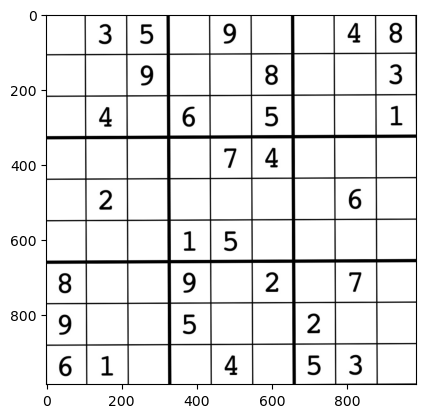

In [66]:
# import recog
import recog_l2
# import cv2
pixel=60

file="sample"
problems=recog_l2.recognize(path=f"./{dir_path}{file}.jpg",arc_epsilon=5e-2)
img=recog_l2.recognize(path=f"./{dir_path}{file}.jpg",arc_epsilon=5e-2,ret_img=1,erase_line=0)
problem=problems[0]
plt.imshow(img)

In [67]:
for file in jpg_files:
        # pixel=60
        problems=recog_l2.recognize(path=f"./{dir_path}{file}.jpg",clf=clf,scaler=scaler,n_close=1,n_open=2,prior_close=1,trim_percentage=0.008,mean_white_axis=0,arc_epsilon=5e-2,erase_line=0)
        # problems
        problem=problems[0]
        with open(f'./{dir_path}{file}.txt', 'r') as f:
            matrix_data = [[int(num) for num in line.split()] for line in f]
        # print matrix data by row
        # for row in matrix_data:
        #     print(row)
        # convert the matrix data into a numpy array
        matrix_array = np.array(matrix_data)
        validate=[matrix_data[i][j]==problem[i][j] for i in range(9) for j in range(9)]
        proba=sum(validate)/len(validate)
        zeros=np.sum(np.array(matrix_data) == 0)
        nonzeros=81-zeros
        failed=81-proba*81
        print(f"{file}","{:.4f}".format(proba),failed,f"failure rate: {failed/nonzeros:.2f}")
        # probas.append(proba)

sample 1.0000 0.0 failure rate: 0.00
sudoku_026 1.0000 0.0 failure rate: 0.00
sudoku_027 1.0000 0.0 failure rate: 0.00
sudoku_028 1.0000 0.0 failure rate: 0.00
sudoku_029 0.9506 4.0 failure rate: 0.10
sudoku_030 1.0000 0.0 failure rate: 0.00


In [69]:
# import recog
import recog_l2
# import cv2
for i in range(4):
    for j in range(4):
        probas=[]
        for file in jpg_files:
            # pixel=60
            problems=recog_l2.recognize(path=f"./{dir_path}{file}.jpg",clf=clf,scaler=scaler,n_close=i,n_open=j,prior_close=1,trim_percentage=0.008,mean_white_axis=0,arc_epsilon=5e-2,erase_line=0)
            # problems
            problem=problems[0]
            with open(f'./{dir_path}{file}.txt', 'r') as f:
                matrix_data = [[int(num) for num in line.split()] for line in f]
            # print matrix data by row
            # for row in matrix_data:
            #     print(row)
            # convert the matrix data into a numpy array
            matrix_array = np.array(matrix_data)
            validate=[matrix_data[i][j]==problem[i][j] for i in range(9) for j in range(9)]
            proba=sum(validate)/len(validate)
            zeros=np.sum(np.array(matrix_data) == 0)
            nonzeros=81-zeros
            failed=81-proba*81
            # print(f"{file}","{:.4f}".format(proba),failed,f"failure rate: {failed/nonzeros:.2f}")
            probas.append(proba)
        print("n_close",i,"n_open",j,"average proba:","{:.4f}".format(sum(probas)/len(probas)))

n_close 0 n_open 0 average proba: 0.9753
n_close 0 n_open 1 average proba: 0.9815
n_close 0 n_open 2 average proba: 0.9918
n_close 0 n_open 3 average proba: 0.9897
n_close 1 n_open 0 average proba: 0.9753
n_close 1 n_open 1 average proba: 0.9815
n_close 1 n_open 2 average proba: 0.9918
n_close 1 n_open 3 average proba: 0.9897
n_close 2 n_open 0 average proba: 0.9753
n_close 2 n_open 1 average proba: 0.9815
n_close 2 n_open 2 average proba: 0.9918
n_close 2 n_open 3 average proba: 0.9897
n_close 3 n_open 0 average proba: 0.9753
n_close 3 n_open 1 average proba: 0.9815
n_close 3 n_open 2 average proba: 0.9918
n_close 3 n_open 3 average proba: 0.9897


In [ ]:
for i in range(4):
    for j in range(4):
        probas=[]
        for file in jpg_files:
            # pixel=60
            problems=recog_l2.recognize(path=f"./{dir_path}{file}.jpg",n_close=i,n_open=j,prior_close=0)
            # problems
            problem=problems[0]
            with open(f'./{dir_path}{file}.txt', 'r') as f:
                matrix_data = [[int(num) for num in line.split()] for line in f]
            # print matrix data by row
            # for row in matrix_data:
            #     print(row)
            # convert the matrix data into a numpy array
            matrix_array = np.array(matrix_data)
            validate=[matrix_data[i][j]==problem[i][j] for i in range(9) for j in range(9)]
            proba=sum(validate)/len(validate)
            zeros=np.sum(np.array(matrix_data) == 0)
            nonzeros=81-zeros
            failed=81-proba*81
            # print(f"{file}","{:.4f}".format(proba),failed,f"failure rate: {failed/nonzeros:.2f}")
            probas.append(proba)
        print("n_close",i,"n_open",j,"average proba:","{:.4f}".format(sum(probas)/len(probas)))

n_close 0 n_open 0 average proba: 0.9588
n_close 0 n_open 1 average proba: 0.9691
n_close 0 n_open 2 average proba: 0.9630
n_close 0 n_open 3 average proba: 0.9671
n_close 1 n_open 0 average proba: 0.9691
n_close 1 n_open 1 average proba: 0.9650
n_close 1 n_open 2 average proba: 0.9650
n_close 1 n_open 3 average proba: 0.9691
n_close 2 n_open 0 average proba: 0.9383
n_close 2 n_open 1 average proba: 0.9383
n_close 2 n_open 2 average proba: 0.9568
n_close 2 n_open 3 average proba: 0.9568
n_close 3 n_open 0 average proba: 0.9115
n_close 3 n_open 1 average proba: 0.9198
n_close 3 n_open 2 average proba: 0.9115
n_close 3 n_open 3 average proba: 0.9362


In [ ]:
# with open(f'./data/{file}.txt', 'r') as f:
#     matrix_data = [[int(num) for num in line.split()] for line in f]
# # print matrix data by row
# for row in matrix_data:
#     print(row)
# # convert the matrix data into a numpy array
# matrix_array = np.array(matrix_data)
# validate=[matrix_data[i][j]==problem[i][j] for i in range(9) for j in range(9)]
# proba=sum(validate)/len(validate)
# zeros=np.sum(np.array(matrix_data) == 0)
# nonzeros=81-zeros
# failed=81-proba*81
# print(proba,failed,f"failure rate: {failed/nonzeros:.2f}")